In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [7]:
import numpy as np
import pandas as pd

class ScratchLogisticRegression():  
    
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/0.01
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _check_for_bias(self,x):
        if self.bias == True:
            x1 = np.one(x.shape[0])
        else:
            x1 = np.zeros(x.shape[0])
            
        return np.concatenate([x1.reshape(-1,1),x],axis=1)
    
    def _sigmoid_function(self,x):
        linear_model = np.dot(x,self.w)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, x, error):
        self.tmp = np.append(0,np.ones(x.shape[1]-1))
        self.w -= self.lr*(np.dot(error,x) + self.tmp*self.lamda*self.w)/len(x)
        
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.w[1:]**2)
    
    def fit(self, x, y, x_val=False, y_val=False):
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
            
        x = self._check_for_bias(x)
        
        self.w = np.random.rand(x.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(x)
            error = y_pred - y
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(x_val) != bool):
                val_x = self._check_for_bias(x_val)
                val_ypred = self._sigmoid_function(val_x)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
                
            self._gradient_descent(x, error)
            
            if self.verbose:
                print('n_iter:', i,
                     'loss:',self.loss[i])

In [8]:
iris = load_iris()
data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
x = iris.loc[iris[4]!=0,2:3].values
y = iris.loc[iris[4]!=0,4].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=True)
model.fit(x_train,y_train)

n_iter: 0 loss: 13.99330738781123
n_iter: 1 loss: 13.754090185939113
n_iter: 2 loss: 13.520635416089654
n_iter: 3 loss: 13.292797255830415
n_iter: 4 loss: 13.070433668306705
n_iter: 5 loss: 12.853406304331926
n_iter: 6 loss: 12.641580406912507
n_iter: 7 loss: 12.434824718151807
n_iter: 8 loss: 12.233011388478264
n_iter: 9 loss: 12.036015888144357
n_iter: 10 loss: 11.843716920943987
n_iter: 11 loss: 11.655996340096971
n_iter: 12 loss: 11.472739066250302
n_iter: 13 loss: 11.29383300754704
n_iter: 14 loss: 11.119168981714491
n_iter: 15 loss: 10.948640640124516
n_iter: 16 loss: 10.78214439377959
n_iter: 17 loss: 10.619579341179387
n_iter: 18 loss: 10.460847198023393
n_iter: 19 loss: 10.305852228706138
n_iter: 20 loss: 10.154501179562457
n_iter: 21 loss: 10.006703213821012
n_iter: 22 loss: 9.862369848225352
n_iter: 23 loss: 9.721414891282462
n_iter: 24 loss: 9.583754383099674
n_iter: 25 loss: 9.449306536771665
n_iter: 26 loss: 9.31799168127999
n_iter: 27 loss: 9.189732205868456
n_iter: 28 l

n_iter: 309 loss: 3.4201063603393074
n_iter: 310 loss: 3.4195927143843017
n_iter: 311 loss: 3.4190878451124673
n_iter: 312 loss: 3.4185915994412355
n_iter: 313 loss: 3.418103827036543
n_iter: 314 loss: 3.4176243802614854
n_iter: 315 loss: 3.4171531141259743
n_iter: 316 loss: 3.416689886237394
n_iter: 317 loss: 3.4162345567522143
n_iter: 318 loss: 3.4157869883285628
n_iter: 319 loss: 3.4153470460797157
n_iter: 320 loss: 3.4149145975285067
n_iter: 321 loss: 3.4144895125626196
n_iter: 322 loss: 3.414071663390755
n_iter: 323 loss: 3.4136609244996534
n_iter: 324 loss: 3.4132571726119476
n_iter: 325 loss: 3.41286028664484
n_iter: 326 loss: 3.4124701476695805
n_iter: 327 loss: 3.4120866388717266
n_iter: 328 loss: 3.411709645512179
n_iter: 329 loss: 3.41133905488896
n_iter: 330 loss: 3.410974756299743
n_iter: 331 loss: 3.4106166410050953
n_iter: 332 loss: 3.4102646021924317
n_iter: 333 loss: 3.4099185349406618
n_iter: 334 loss: 3.409578336185519
n_iter: 335 loss: 3.4092439046855505
n_iter: 336

Let plot the losses

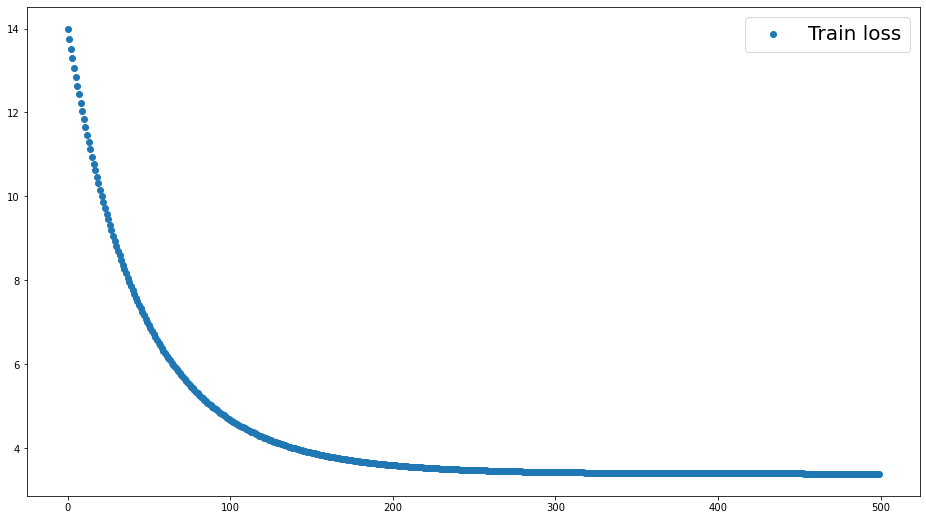

In [12]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(model.loss)),model.loss,label='Train loss')
plt.legend();

In [13]:
class ScratchLogisticRegression():  
    
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/0.01
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _check_for_bias(self,x):
        if self.bias == True:
            x1 = np.one(x.shape[0])
        else:
            x1 = np.zeros(x.shape[0])
            
        return np.concatenate([x1.reshape(-1,1),x],axis=1)
    
    def _sigmoid_function(self,x):
        linear_model = np.dot(x,self.w)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, x, error):
        self.tmp = np.append(0,np.ones(x.shape[1]-1))
        self.w -= self.lr*(np.dot(error,x) + self.tmp*self.lamda*self.w)/len(x)
        
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.w[1:]**2)
    
    def fit(self, x, y, x_val=False, y_val=False):
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
            
        x = self._check_for_bias(x)
        
        self.w = np.random.rand(x.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(x)
            error = y_pred - y
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(x_val) != bool):
                val_x = self._check_for_bias(x_val)
                val_ypred = self._sigmoid_function(val_x)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
                
            self._gradient_descent(x, error)
            
            if self.verbose:
                print('n_iter:', i,
                     'loss:',self.loss[i])
                
    def predict(self, x):
            x = self._check_for_bias(x)
            y_pred = self._sigmoid_function(x)
            return np.where(y_pred<0.5,self.ylabel[0],self.ylabel[1])
        
    def predict_proba(self, x):
            x = self._check_for_bias(x)
            self._sigmoid_function(x)
            return self._sigmoid_function(x)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = ScratchLogisticRegression(num_iter=1000, lr=0.001,  verbose=False)
model.fit(x_train,y_train)
label_pred = model.predict(x_test)
proba_pred = model.predict_proba(x_test)

In [15]:
accuracy = accuracy_score(y_test, label_pred)
precision = precision_score(y_test, label_pred, average='weighted')
recall = recall_score(y_test, label_pred, average='weighted')

print("-----------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

-----------
accuracy 0.5
precision 0.25
recall 0.5


C:\Users\SULCOTT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision region

In [26]:
def decision_region(x, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor','virginica']):
    
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.min(x[:,0])-0.5, np.max(x[:,0])+0.5, step), np.arange(np.min(x[:,1])-0.5, np.max(x[:,1])+0.5, step)
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(x[y==target][:, 0], x[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [ ]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(x,y,model)